# Problem Analysis

### This Data is about users' activity on a website. Based on information of user activity, we can predict if a viwer user could turn into a register user. The user activities are defined as events in the data. If a user have one of following activities, we deem this user as a register:
    - formSubmit
    - clickSubmit
    - click_send_cellphone
    - verify_cellphone_code

# Read Raw Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

# sample code
import pandas as pd
import numpy as np
raw = pd.read_table('sensorswww_data.txt', header=None)
raw[0][2] # display sample raw data

'{"distinct_id":"9939d3e087bca29c42334d96dccd25ca0e06652a","lib":{"$lib":"js","$lib_method":"code","$lib_version":"1.6.20"},"properties":{"$os":"windows","$model":"pc","$os_version":"10","$screen_height":768,"$screen_width":1366,"$lib":"js","$lib_version":"1.6.20","$browser":"chrome","$browser_version":"56","$latest_referrer":"","$latest_referrer_host":"","_latest_ch":"demo","_session_referrer":"","_session_referrer_host":"","session_page_url":"https://sensorsdata.cn/?ch=demo","$referrer":"","$referrer_host":"","$url":"https://sensorsdata.cn/?ch=demo","$url_path":"/","$title":"神策数据 | Sensors Data - 国内领先的用户行为分析产品","ch":"demo","$is_first_day":true,"$is_first_time":true,"$ip":"111.204.198.242"},"type":"track","event":"$pageview","_nocache":"9587552771961","time":1488791050856}'

# Clean Data

Here raw data is javascript like, whose format is similar to <span style="color:red">python dictionary</span>. First convert <span style="color:red">python dictionary like strings to python dictionary</span>, then convert <span style="color:red">python dictionary to pandas dataframe</span>

In [2]:
import json
json.loads(raw[0][2])

{'_nocache': '9587552771961',
 'distinct_id': '9939d3e087bca29c42334d96dccd25ca0e06652a',
 'event': '$pageview',
 'lib': {'$lib': 'js', '$lib_method': 'code', '$lib_version': '1.6.20'},
 'properties': {'$browser': 'chrome',
  '$browser_version': '56',
  '$ip': '111.204.198.242',
  '$is_first_day': True,
  '$is_first_time': True,
  '$latest_referrer': '',
  '$latest_referrer_host': '',
  '$lib': 'js',
  '$lib_version': '1.6.20',
  '$model': 'pc',
  '$os': 'windows',
  '$os_version': '10',
  '$referrer': '',
  '$referrer_host': '',
  '$screen_height': 768,
  '$screen_width': 1366,
  '$title': '神策数据 | Sensors Data - 国内领先的用户行为分析产品',
  '$url': 'https://sensorsdata.cn/?ch=demo',
  '$url_path': '/',
  '_latest_ch': 'demo',
  '_session_referrer': '',
  '_session_referrer_host': '',
  'ch': 'demo',
  'session_page_url': 'https://sensorsdata.cn/?ch=demo'},
 'time': 1488791050856,
 'type': 'track'}

In [3]:
import json
# convert python dictionary like string to python dictionary
sample = json.loads(raw[0][2]) 
# convert python dictionary to pandas dataframe
sample = pd.DataFrame(pd.Series(sample)).transpose()
sample

,_nocache,distinct_id,event,lib,properties,time,type
0,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,"{'$lib': 'js', '$lib_method': 'code', '$lib_ve...","{'$os': 'windows', '$model': 'pc', '$os_versio...",1488791050856,track


In [4]:
# column lib and properties are also python dictionary, we do similar processing
pd.DataFrame(pd.Series(sample.lib.values[0])).transpose()
pd.DataFrame(pd.Series(sample.properties.values[0])).transpose()

,$browser,$browser_version,$ip,$is_first_day,$is_first_time,$latest_referrer,$latest_referrer_host,$lib,$lib_version,$model,...,$screen_height,$screen_width,$title,$url,$url_path,_latest_ch,_session_referrer,_session_referrer_host,ch,session_page_url
0,chrome,56,111.204.198.242,True,True,,,js,1.6.20,pc,...,768,1366,神策数据 | Sensors Data - 国内领先的用户行为分析产品,https://sensorsdata.cn/?ch=demo,/,demo,,,demo,https://sensorsdata.cn/?ch=demo


Since different event corresponds to different **lib** and **properties**, we could separate the data based on event. Then I generate such files:

|clickSubmit.csv| btnClick.csv |$pageview.csv  |formSubmit.csv | profile_set_once.csv|page_close.csv |
|------------------------|-------------------------|---------------|
|click_send_cellphone.csv|demo_leave.csv           |about_leave.csv|courses_leave.csv       |verify_cellphone_code.csv|index_leave.csv|courses_play_leave.csv  | 

For each event file, I process it based on user_id:
- sum pageStayTime
- count event happened times
- extract os, browser, model infos

In [5]:
# Cleaned Data Sample
Cleaned_Data = pd.read_csv('Data.csv', index_col='Unnamed: 0')
Cleaned_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8267 entries, 95607b6a81d197f182ccd924b8e993672929eeae to c921ae86e47ee21176dd65ca34a784f77eada6b2
Data columns (total 19 columns):
btnClick_times                                8267 non-null float64
$pageview_times                               8267 non-null float64
profile_set_once_times                        8267 non-null float64
page_close_times                              8267 non-null float64
page_close_properties_pageStayTime            8267 non-null float64
demo_leave_times                              8267 non-null float64
demo_leave_properties_pageStayTime            8267 non-null float64
about_leave_times                             8267 non-null float64
about_leave_properties_pageStayTime           8267 non-null float64
courses_leave_times                           8267 non-null float64
courses_leave_properties_pageStayTime         8267 non-null float64
index_leave_times                             8267 non-null float64
index_l

In [6]:
# head of Cleaned data
Cleaned_Data.head()

,btnClick_times,$pageview_times,profile_set_once_times,page_close_times,page_close_properties_pageStayTime,demo_leave_times,demo_leave_properties_pageStayTime,about_leave_times,about_leave_properties_pageStayTime,courses_leave_times,courses_leave_properties_pageStayTime,index_leave_times,index_leave_properties_pageStayTime,courses_play_leave_times,courses_play_leave_properties_pageStayTime,os,model,browser,label
95607b6a81d197f182ccd924b8e993672929eeae,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.113,0.0,0.0,macosx,mac,safari,0.0
6488a2cd223b225f0ffe665cc490af8c4f3555bd,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.970,0.0,0.0,windows,pc,sogou,0.0
1bb7f2c57eff570bc10c15a2bb8f00259d9ecd9f,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,windows,pc,chrome,0.0
2be63f8e23c239229d621fdc167e4f28a2a0ac61,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,iOS,iphone,webview,0.0
424a8be98f432955853e93752f4369affdd957ab,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3000.990,0.0,0.0,macosx,mac,chrome,0.0


# Data Analysis

###  data sparsity: ( len(none_zero_row) / length )

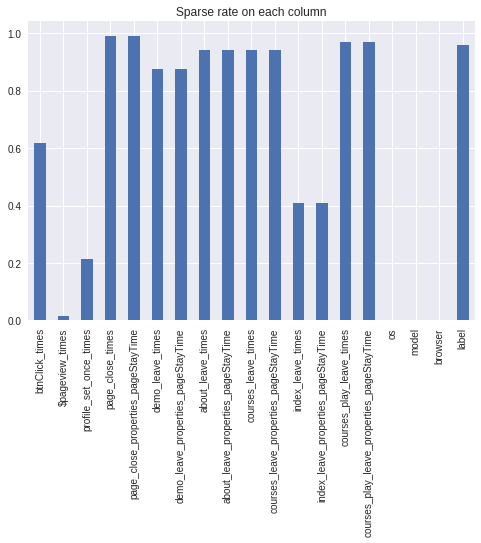

In [7]:
# plot sparsity on each column
import matplotlib.pyplot as plt
import seaborn as sns
def iszero(x):
    return sum(x==0)/len(x)
Cleaned_Data.apply(lambda x: iszero(x)).plot(kind='bar', title = 'Sparse rate on each column')
plt.show()

### Extremely imbalance (reader / register)

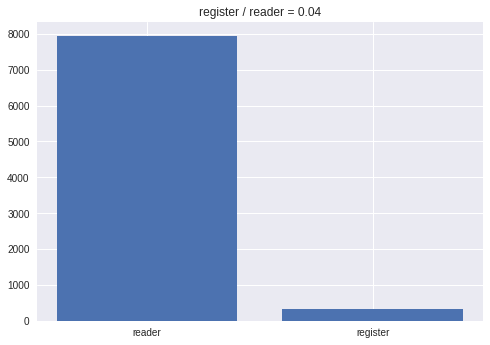

In [8]:
plt.bar([0, 1],
        Cleaned_Data.label.value_counts(),
        tick_label=['reader', 'register'])
plt.title('register / reader = %.2f' % (Cleaned_Data.label.sum()/Cleaned_Data.label.count()))
plt.show()

### numerical data are extremely right skew since many users never such a properties

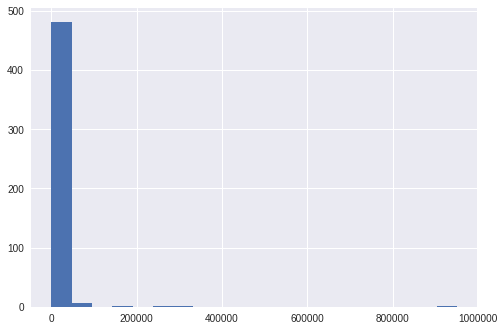

In [9]:
# zeros are reasonable which means no such events
# even without zeros, data are still extremely skewed
# so we need to do log transformation
nonzero = Cleaned_Data.about_leave_properties_pageStayTime[Cleaned_Data.about_leave_properties_pageStayTime != 0]
nonzero.hist(bins = 20)
plt.show()

### Normalize numberical columns and log transformation

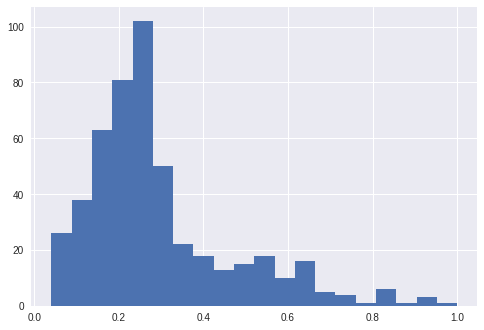

In [10]:
def log_trans(x):
    return np.log(x + 1)
normalize = nonzero.apply(lambda x: log_trans(x))
normalize = normalize/normalize.max()
normalize.hist(bins = 20)
plt.show()

### Visualize Collinearaity
#### covariance matrix doesn't show strong collinearaity here

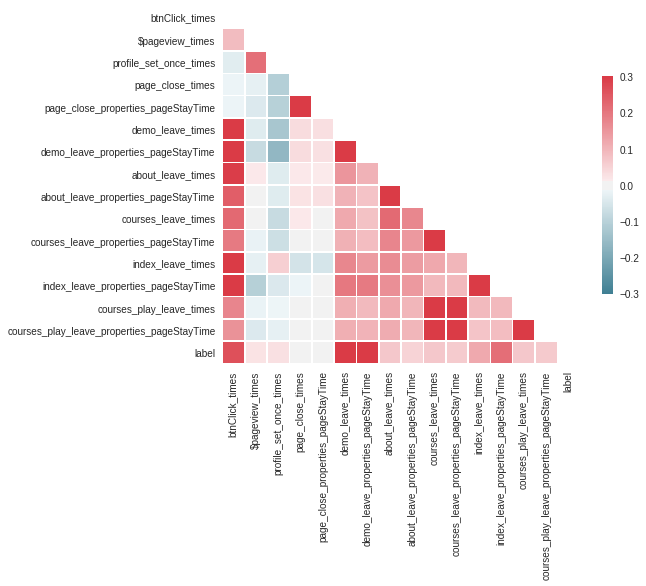

In [11]:
Dat = pd.read_csv('Dat_simple.csv')
sns.set(style="white")
# Compute the correlation matrix
corr = Dat.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

# Build Classification model
Since I form the problem to classification problem, I will choose logistic regression and svm to do classification. We see the **imbalance** nature of this Dataset, the solution of this problem is simple **downsampling** and add **class weight** on classifier.

### Prepare Data

In [12]:
warnings.filterwarnings('ignore')
from Plot_Metrics import plot_ROC, plot_Precision_Recall, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from ParamSearch import CVSearchParams

/home/ye/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# load Data
Data = pd.read_csv('Clean_Data.csv', index_col='Unnamed: 0')

# imbalance downsampling 
Data_down_extra_ind = Data[Data.label == 0].sample(frac = 0).index
Data_down_extra = Data.loc[Data_down_extra_ind]
Data_down = Data.drop(Data_down_extra_ind)
y = Data_down.label.values
X = Data_down.drop('label', axis = 1).as_matrix().astype('float')
y_extra = Data_down_extra.label.values
X_extra = Data_down_extra.drop('label', axis = 1).as_matrix().astype('float')

# Split the dataset in two train and test parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.1)

y_test = np.append(y_test, y_extra)
X_test = np.concatenate((X_test, X_extra), axis=0)
DataSet = {'X_train': X_train,
           'X_test': X_test,
           'y_train': y_train,
           'y_test': y_test}

### choosing evaluation metrics
We cannot choosing accuracy as main metrics because of imbalanceness.
Instead, I think **recall** rate is the most important, because the web site company will most care about who will be register, and why some user can not become register.

Here we also use **stratified cross validation** and **grid search** method to tune the classifier

In [14]:
scores = ['roc_auc', 'precision', 'recall', 'accuracy']

### Logistic regression classifier

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 0.1, 'penalty': 'l2'}

Grid scores on development set:

0.882 (+/-0.008) for {'C': 0.1, 'penalty': 'l2'}
0.874 (+/-0.016) for {'C': 1.0, 'penalty': 'l2'}
0.873 (+/-0.016) for {'C': 100, 'penalty': 'l2'}
0.875 (+/-0.014) for {'C': 0.1, 'penalty': 'l1'}
0.874 (+/-0.016) for {'C': 1.0, 'penalty': 'l1'}
0.873 (+/-0.016) for {'C': 100, 'penalty': 'l1'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

      False       1.00      0.88      0.93       785
       True       0.25      0.94      0.39        34

avg / total       0.97      0.88      0.91       819


Confusion matrix, without normalization
[[687   2]
 [ 98  32]]


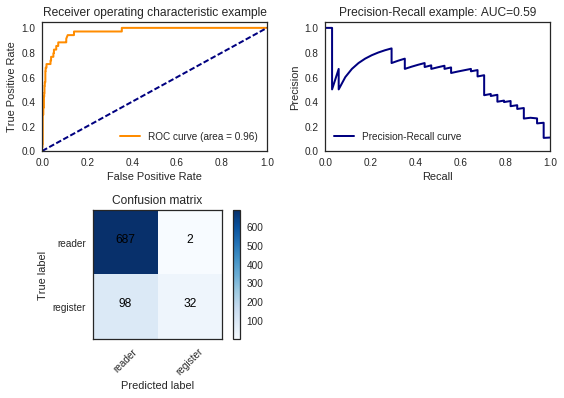

In [15]:
# tuned parameters
logit_params = [{'penalty':['l2'],
                 'C': [0.1, 1.0, 100]},
                {'penalty':['l1'],
                 'C': [0.1, 1.0, 100]}]
# model
logit = LogisticRegression(class_weight='balanced')

# cv grid search
y_score, y_pred = CVSearchParams(scores[3], logit, logit_params, DataSet)

# Visualizing Result
class_names = np.array(['reader', 'register'])
plt.subplot(221)
plot_ROC(y_test, y_score)
plt.subplot(222)
plot_Precision_Recall(y_test, y_score)
plt.subplot(223)
plot_confusion_matrix(y_pred, y_test, normalize=False, classes=class_names)
plt.show()

In [16]:
31/34

0.9117647058823529

### SVM Classifier

In [17]:
'''
# tuned parameters
svm_params = [{'kernel': ['rbf'],
               'gamma': [1e-3, 1e-4],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'],
               'C': [1, 10, 100, 1000]}]

# initialize model
svm = SVC(probability=True,class_weight = 'balanced')

# cv grid search
y_score, y_pred = CVSearchParams(scores[1], svm, svm_params, DataSet)

# Visualizing Result
class_names = np.array(['reader', 'register'])
plt.subplot(221)
plot_ROC(y_test, y_score)
plt.subplot(222)
plot_Precision_Recall(y_test, y_score)
plt.subplot(223)
plot_confusion_matrix(y_pred, y_test, normalize=False, classes=class_names)
plt.show()
'''

"\n# tuned parameters\nsvm_params = [{'kernel': ['rbf'],\n               'gamma': [1e-3, 1e-4],\n               'C': [1, 10, 100, 1000]},\n              {'kernel': ['linear'],\n               'C': [1, 10, 100, 1000]}]\n\n# initialize model\nsvm = SVC(probability=True,class_weight = 'balanced')\n\n# cv grid search\ny_score, y_pred = CVSearchParams(scores[1], svm, svm_params, DataSet)\n\n# Visualizing Result\nclass_names = np.array(['reader', 'register'])\nplt.subplot(221)\nplot_ROC(y_test, y_score)\nplt.subplot(222)\nplot_Precision_Recall(y_test, y_score)\nplt.subplot(223)\nplot_confusion_matrix(y_pred, y_test, normalize=False, classes=class_names)\nplt.show()\n"

### RandomForest Classifier

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'criterion': 'entropy', 'n_estimators': 500}

Grid scores on development set:

0.508 (+/-0.144) for {'criterion': 'gini', 'n_estimators': 100}
0.518 (+/-0.114) for {'criterion': 'gini', 'n_estimators': 500}
0.508 (+/-0.103) for {'criterion': 'gini', 'n_estimators': 1000}
0.515 (+/-0.133) for {'criterion': 'entropy', 'n_estimators': 100}
0.525 (+/-0.120) for {'criterion': 'entropy', 'n_estimators': 500}
0.524 (+/-0.108) for {'criterion': 'entropy', 'n_estimators': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

      False       0.98      0.96      0.97       785
       True       0.36      0.47      0.41        34

avg / total       0.95      0.94      0.95       819


Confusion matrix, without normalization
[[756  18]
 [ 29  16]]


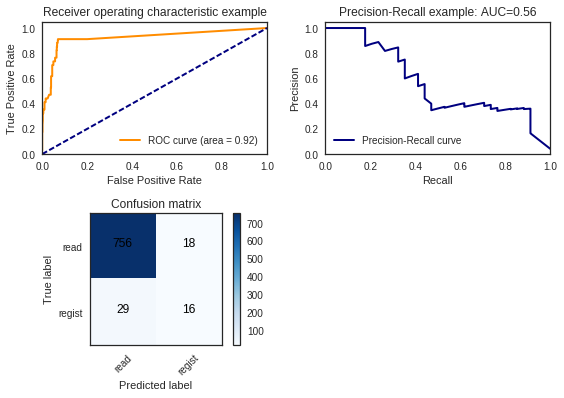

In [18]:
rf_params = [{'n_estimators': [100, 500, 1000],
              'criterion': ['gini', 'entropy']}]

rf = RandomForestClassifier(class_weight='balanced')

y_score, y_pred = CVSearchParams(scores[2], rf, rf_params, DataSet)

class_names = np.array(['read', 'regist'])
plt.subplot(221)
plot_ROC(y_test, y_score)
plt.subplot(222)
plot_Precision_Recall(y_test, y_score)
plt.subplot(223)
plot_confusion_matrix(y_pred, y_test, normalize=False, classes=class_names)
plt.show()